0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


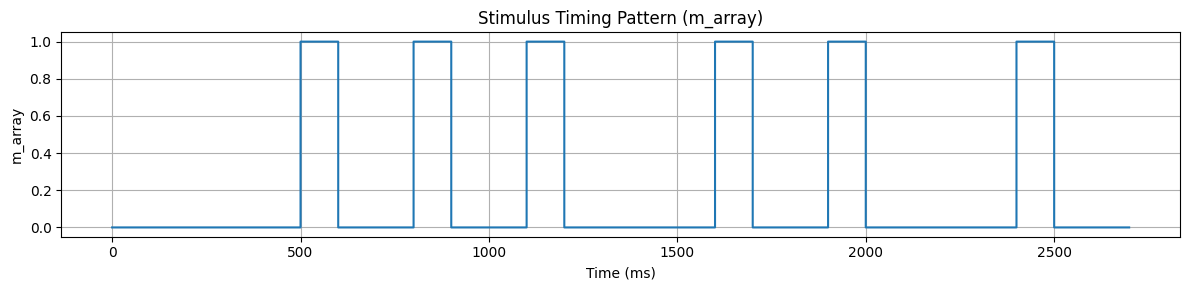

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Define parameters ---
delta_tr = 1.0         # timestep (ms)
tinit = 500.0          # time before any CS starts
tCS_dur = 100.0        # duration of CS pulse
tCS_off = 200.0        # off-time between pulses
nCSA = 3               # number of CS-A pulses
nCSB = 2               # number of CS-B pulses

# --- Create single CS pulse (on-off structure) ---
aux = np.zeros(int((tCS_dur + tCS_off) / delta_tr))
aux[:int(tCS_dur / delta_tr)] = 1

# --- Build full m_array ---
m_array = np.concatenate([
    np.zeros(int(tinit / delta_tr)),          # Initial delay
    np.tile(aux, nCSA),                       # CS-A pulses
    np.zeros(int(tCS_off / delta_tr)),        # Off gap between CS-A and CS-B
    np.tile(aux, nCSB),                       # CS-B pulses
    np.zeros(int(tCS_off / delta_tr)),        # Off gap between CS-B and final CS
    np.tile(aux, 1)                           # One last CS pulse
])

# for i in m_array:
#     print(i)

# --- Create time vector ---
time = np.arange(len(m_array)) * delta_tr

# --- Plot ---
plt.figure(figsize=(12, 3))
plt.plot(time, m_array, drawstyle='steps-post')
plt.xlabel('Time (ms)')
plt.ylabel('m_array')
plt.title('Stimulus Timing Pattern (m_array)')
plt.grid(True)
plt.tight_layout()
plt.show()


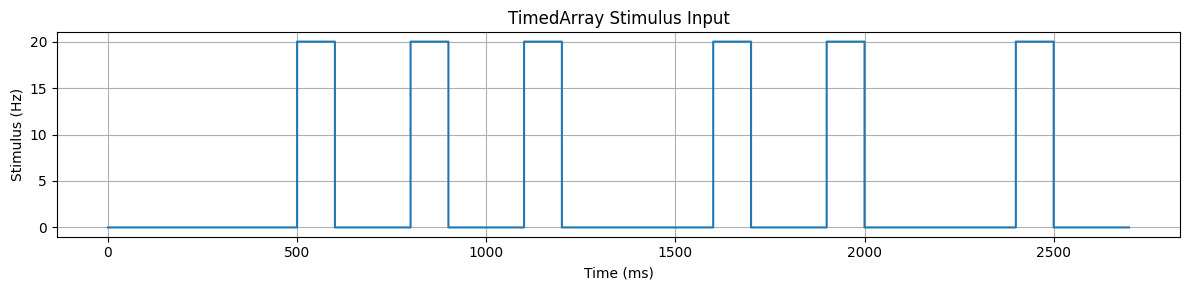

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *

# Parameters
delta_tr = 1.0  # ms
tinit = 500.0
tCS_dur = 100.0
tCS_off = 200.0
nCSA = 3
nCSB = 2
fCS = 20.0  # Hz

# Build m_array
aux = np.zeros(int((tCS_dur + tCS_off) / delta_tr))
aux[:int(tCS_dur / delta_tr)] = 1
m_array = np.concatenate([
    np.zeros(int(tinit / delta_tr)),
    np.tile(aux, nCSA),
    np.zeros(int(tCS_off / delta_tr)),
    np.tile(aux, nCSB),
    np.zeros(int(tCS_off / delta_tr)),
    np.tile(aux, 1)
])

# Create stimulus TimedArray
stimulus = TimedArray(m_array * fCS * Hz, dt=delta_tr * ms)

# Plot the values of the TimedArray
times = np.arange(len(m_array)) * delta_tr  # in ms
stim_values = m_array * fCS

plt.figure(figsize=(12, 3))
plt.plot(times, stim_values, drawstyle='steps-post')
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus (Hz)')
plt.title('TimedArray Stimulus Input')
plt.grid(True)
plt.tight_layout()
plt.show()
